1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


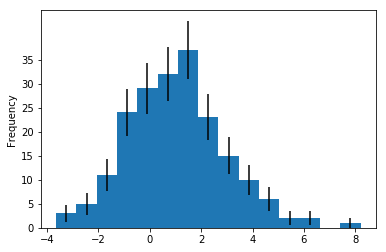

In [61]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import scipy as sp
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

N = 200
x = np.random.normal(1, 2, N)
y, binEdges = np.histogram(x, bins = 15)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
menStd     = np.sqrt(y)
width      = 0.05

plt.figure()
plt.hist(x, bins = 15)
plt.ylabel('Frequency')
plt.yticks(ticks = np.arange(0,40,5))
plt.bar(bincenters, y, width=width, yerr=menStd)
plt.show()

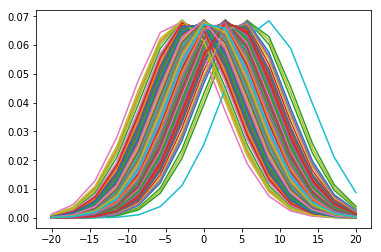

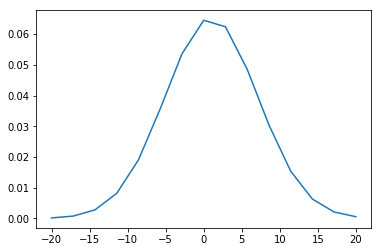

199.68615978206287


In [63]:
t = np.linspace(-20, 20, num = 15)
stderror = 1.06*x.std()*x.size**(0.2)
G = np.zeros((N, 15))

for i in range(len(x)):
    for j in range(len(t)):
        G[i][j] = stats.norm.pdf(t[j], loc = x[i], scale = stderror)

        
        
        
plt.figure()
for g in G:
    plt.plot(t, g)
plt.show()


Z = np.sum(G, axis = 0)



plt.plot(t, Z/sp.integrate.trapz(y = Z, x = t))
plt.show()

print(sp.integrate.trapz(y = Z, x = t))

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

--2018-12-04 13:09:44--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.1, 2620:100:6025:1::a27d:4501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [following]
--2018-12-04 13:09:44--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0cfa823fdf1a0d4f3a6e73f11f.dl.dropboxusercontent.com/cd/0/inline/AW0XwhtezDAIbQzP_l_GV0ChBIGBuSXZvMCcOUXPWCAWffFFXKcR6Q3oO2itNO7IgLLy4NxFbr8Z4ryo6M_P2ufdmROoN8-KZEMnPehIT9wD7x4jfBXzKFAun5KCGtDjjelBBY55kfC_41PKd_Y8BZJUDcxVNAFS2xKs9PEN6dFZdsUbWQ6qjx4UJXJcyOxWi2o/file [following]
--2018-12-04 13:09:44--  https://uc0cfa823fdf1a0d4f3a6e73f11f.dl.dropboxusercontent.com/cd/

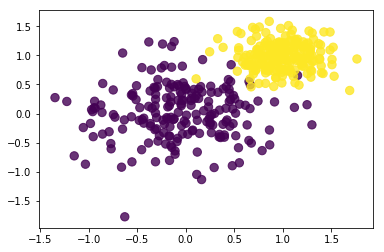

In [3]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')


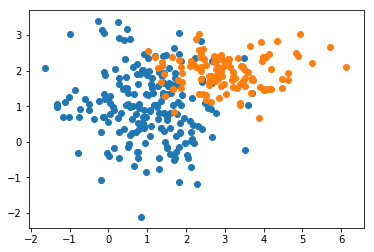

In [4]:
def Gaussian2Dsample(mx, my, sx, sy, N):
    x = np.random.normal(loc = mx, scale = sx, size = N)
    y = np.random.normal(loc = my, scale = sy, size = N)
    return [x, y]

plt.figure()
U= Gaussian2Dsample(1, 1, 1, 1, 200)
V= Gaussian2Dsample(3, 2, 1, 0.5, 120)
plt.scatter(U[0], U[1])
plt.scatter(V[0], V[1])
plt.show()


3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should you the `np.load()` function to load the file as a numpy array and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

<Figure size 432x288 with 0 Axes>

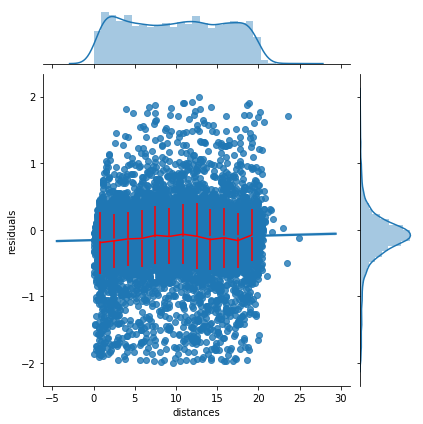

In [5]:
import pandas as pd
import seaborn as sns


dat = pd.DataFrame(np.load('data/residuals_261.npy').item())


cleandat = dat[ abs(dat['residuals']) < 2 ]

A, B, rval, pval, stderr = stats.linregress(cleandat['distances'], cleandat['residuals'])


numbins = 12
binwidth = 20/numbins
x = np.arange(0, 20, binwidth)+binwidth/2
y = np.array([ (cleandat[abs(cleandat['distances']-b) < binwidth/2]['residuals'].mean())  for b in x ])
erry = np.array([ (cleandat[abs(cleandat['distances']-b) < binwidth/2]['residuals'].std())  for b in x ])


plt.figure()
sns.jointplot(x="distances", y="residuals", data=cleandat, kind = 'reg')
plt.errorbar(x, y, yerr = erry, color = 'r')
plt.show()